In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
df = pd.read_csv('./subwaytime.csv', encoding='cp949')
df

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,2019-01,1호선,150.0,서울역,927,22,10682,8774,13504,45545,...,33149,19442,3612,7167,0,410,0,0,0,0
2,2019-01,1호선,151.0,시청,74,0,2409,4049,3532,19241,...,14478,4079,981,1256,3,29,0,0,0,0
3,2019-01,1호선,152.0,종각,100,8,4409,5105,4593,26969,...,54264,5560,4886,1722,0,0,0,0,0,0
4,2019-01,1호선,153.0,종로3가,122,4,5061,2520,3876,12832,...,25970,5503,3214,2471,0,52,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2019-01,우이신설선,4709.0,북한산보국문,5,3,1907,561,6026,2270,...,1450,6536,450,1940,0,0,0,0,0,0
595,2019-01,우이신설선,4710.0,정릉,3,0,1508,625,4799,1809,...,869,3595,287,1133,0,0,0,0,0,0
596,2019-01,우이신설선,4711.0,성신여대입구(돈암),2,0,769,281,1172,931,...,3149,2152,648,662,0,0,0,0,0,0
597,2019-01,우이신설선,4712.0,보문,0,0,407,190,770,928,...,575,1179,135,456,0,1,0,0,0,0


In [3]:
f = open('./subwaytime.csv', encoding='cp949')
data = csv.reader(f)

time = []
yvalue = [0 for i in range(24)]
max_location = ['' for i in range(24)]
for i, row in enumerate(data):
    if i == 0:
        for col in row[4:]:
            if not col == '': 
                time.append(col)
    elif i == 1:
        continue
    else:
        row[4:] = map(int, row[4:])
        for j in range(24):
            if yvalue[j] < row[j * 2 + 4]:
                yvalue[j] = row[j * 2 + 4]
                max_location[j] = row[3]

xvalue = []
for t, l in zip(time, max_location):
    short_time = t.split(':')[0]
    xvalue.append(f'{short_time}시({l})')

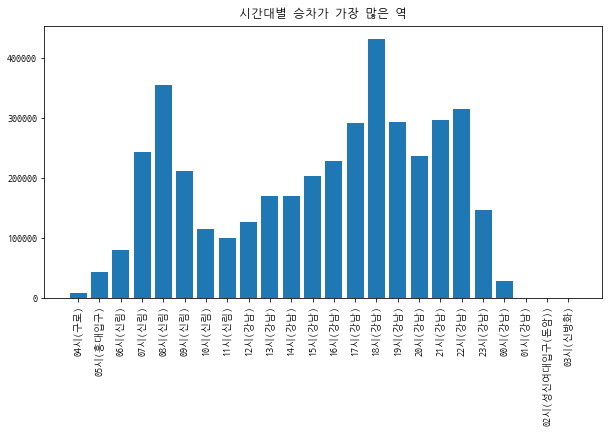

In [5]:
plt.figure(figsize=(10,5))
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.title('시간대별 승차가 가장 많은 역', pad=10)
plt.bar(xvalue, yvalue)
plt.xticks(rotation=90)
plt.show()